# Measures

### Example:

In [1]:
import pandas as pd

In [14]:
data = pd.Series([2,5,4,5,3])

In [15]:
data

0    2
1    5
2    4
3    5
4    3
dtype: int64

In [16]:
data.mean()

3.8

In [17]:
data.mode()

0    5
dtype: int64

In [18]:
data.median()

4.0

In [19]:
data.max()

5

In [20]:
data.min()

2

In [21]:
(data.min() + data.max()) / 2

3.5

In [23]:
# range
data.max()-data.min()

3

In [24]:
data.quantile(0.75)

5.0

In [26]:
# IQR
data.quantile(0.75) - data.quantile(0.25)

2.0

In [29]:
data.std()  # default: ddof=1

1.3038404810405297

In [30]:
data.std(ddof=0)  # population (all possible data, not theorising about the bigger)

1.16619037896906

In [31]:
mean = data.mean()
stdev = data.std()

mean + 2 * stdev

6.407680962081059

In [32]:
mean - 2 * stdev

1.1923190379189403

In [33]:
data

0    2
1    5
2    4
3    5
4    3
dtype: int64

In [34]:
# IQR
IQR = data.quantile(0.75) - data.quantile(0.25)

In [43]:
q3 = data.quantile(0.75)
q1 = data.quantile(0.25)

In [36]:
q3

5.0

In [37]:
IQR

2.0

In [41]:
q3 + 1.5 * IQR

8.0

In [44]:
q1 - 1.5 * IQR

0.0

### Exercise 1

In [2]:
import pandas as pd

In [12]:
data = [4,11,89,37,51,28,11,90]
df = pd.Series(data)

In [13]:
mean = df.mean()
variance = df.var()
stdev = df.std()

In [14]:
mean

40.125

In [15]:
variance

1164.6964285714287

In [16]:
stdev

34.127649033758956

In [17]:
lower_bound_method1 = mean - 2 * stdev
upper_bound_method1 = mean + 2 * stdev
outliers_method1 = [x for x in data if x < lower_bound_method1 or x > upper_bound_method1]

In [18]:
outliers_method1

[]

### Exercise 3

In [19]:
import pandas as pd
import numpy as np

In [21]:
df = pd.read_csv('Data/investment_performance.csv')

In [22]:
df

,Control Scores,Experimental Scores
0,76.586471,74.549525
1,69.908703,70.700829
2,73.936652,88.982201
3,88.199987,84.108943
4,95.266521,97.606320
5,70.496647,68.163111
6,91.520044,74.819034
7,79.012866,110.625783
8,72.207156,83.896866
9,75.993636,88.813311


In [27]:
control_mean = df['Control Scores'].mean()
control_mean

78.08751663789478

In [28]:
control_mode = df['Control Scores'].mode().iloc[0]
control_mode

61.135907012612826

In [29]:
control_median = df['Control Scores'].median()
control_median

77.38615374332923

In [30]:
control_mid_range = (df['Control Scores'].min() + df['Control Scores'].max()) / 2
control_mid_range

78.24753427263798

# Visualisations and skew

### Exercise: Compare two groups using histograms

In [31]:
import pandas as pd

df = pd.read_csv('Data/investment_performance.csv')

In [32]:
df

,Control Scores,Experimental Scores
0,76.586471,74.549525
1,69.908703,70.700829
2,73.936652,88.982201
3,88.199987,84.108943
4,95.266521,97.606320
5,70.496647,68.163111
6,91.520044,74.819034
7,79.012866,110.625783
8,72.207156,83.896866
9,75.993636,88.813311


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

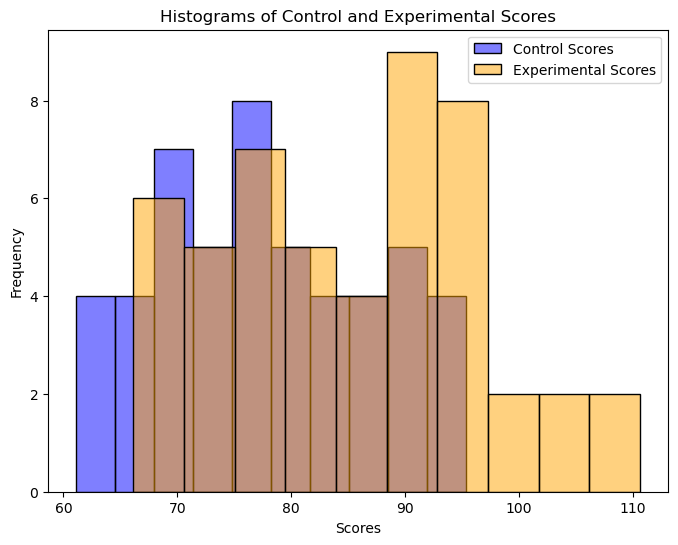

In [42]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Control Scores', bins=10, color='blue', label='Control Scores', alpha=0.5)
sns.histplot(data=df, x='Experimental Scores', bins=10, color='orange', label='Experimental Scores', alpha=0.5)
plt.title('Histograms of Control and Experimental Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.legend()
plt.show()